In [1]:
import os
import random
import pandas as pd
from openpyxl import Workbook, load_workbook
from openpyxl.styles import Font, numbers
from openpyxl.chart import BarChart, Reference
from openpyxl.worksheet.table import Table, TableStyleInfo
from openpyxl.drawing.image import Image

import utils.globalsettings as gs

# magic commands to reload the module
%load_ext autoreload
%autoreload 2

# Creación y manejo de archivos Excel con openpyxl

Este capítulo te enseñará cómo crear archivos Excel desde cero, cómo trabajar con diferentes hojas de cálculo dentro de esos archivos, y cómo manipular los datos dentro de las celdas.

## Crear y Guardar Archivos Excel
Empezaremos aprendiendo a crear un nuevo libro de Excel y cómo guardarlo en tu sistema. Ya viste un ejemplo de esto en el trabajo práctico anterior, pero ahora vamos a explorar más detalles y opciones.

In [2]:
# Crear un nuevo libro de trabajo
wb = Workbook()

# Guardar el libro de trabajo en un archivo
wb.save(os.path.join(gs.the_folders.DIR_OUTPUTS_FILES, "mi_nuevo_archivo_excel.xlsx"))


## Trabajar con Hojas de Cálculo
Cada libro de Excel puede contener múltiples hojas de cálculo. openpyxl te permite añadir, eliminar, y seleccionar hojas de cálculo específicas para trabajar con ellas.

### Añadir una nueva hoja de cálculo:

In [3]:
ws1 = wb.create_sheet(title="Hoja1")

### Seleccionar una hoja de cálculo existente:

In [4]:
ws2 = wb["Hoja1"]


### Eliminar una hoja de cálculo:

In [5]:
wb.remove(ws1)


## Escribir y Leer Datos en Celdas
Manipular los datos dentro de las celdas es esencial para crear reportes útiles. openpyxl te permite escribir datos en las celdas y leer los datos existentes.

### Escribir datos en una celda:

In [6]:
ws = wb.create_sheet(title="Hoja1")

ws['A1'] = "Esto es una prueba"

### Leer datos de una celda:

In [7]:
valor_a1 = ws['A1'].value
valor_a1

'Esto es una prueba'

## Formateo Básico de Celdas
El aspecto visual de tu hoja de cálculo es tan importante como los datos que contiene. openpyxl permite aplicar diferentes estilos a las celdas para mejorar la presentación de tus datos.

### Establecer el tamaño de fuente y el color:

In [8]:
ws['A1'].font = Font(size=14, color="FF0000")


### Aplicar formato a los números:

In [9]:
ws['B1'].number_format = numbers.FORMAT_CURRENCY_USD_SIMPLE


## Trabajo Práctico
Para reforzar lo aprendido en este capítulo, realiza los siguientes ejercicios:

1. Crea un archivo Excel que contenga al menos 2 hojas de cálculo. En cada hoja, añade datos que consideres útiles para practicar (por ejemplo, una lista de nombres en una hoja y una lista de números en otra).

2. Aplica formateo básico a algunas de las celdas en ambas hojas. Experimenta con diferentes fuentes, colores y formatos de número.

3. Lee los datos de algunas celdas que hayas escrito y muestra esos datos usando print().

In [10]:
# Crear un nuevo libro de trabajo
wb = Workbook()

ws1 = wb.create_sheet(title="Hoja1")
ws2 = wb.create_sheet(title="Hoja2")

lst_nombres = ["Juan", "Pedro", "Luis", "Ana", "Maria", "Lucia", "Carlos", "Pablo", "Sofia", "Jose"]
lst_hex_colors = ["FF0000", "00FF00", "0000FF", "FFFF00", "00FFFF", "FF00FF", "C0C0C0", "808080", "800000", "808000"]

for i, n in enumerate(lst_nombres, start=1):
    ws1[f"A{i}"] = n
    ws1[f"A{i}"].font = Font(size=14+i, color=lst_hex_colors[i-1])

lst_numeros = random.sample(range(1, 100), 10)
# create list of number formats for each number
lst_number_formats = [numbers.FORMAT_CURRENCY_USD_SIMPLE for _ in range(10)]
numbers.FORMAT_NUMBER_00

for i, n in enumerate(lst_numeros, start=1):
    ws2[f"B{i}"] = n
    if n % 2 == 0:
        ws2[f"B{i}"].number_format = numbers.FORMAT_CURRENCY_USD_SIMPLE
    else:
        ws2[f"B{i}"].number_format = numbers.FORMAT_NUMBER_00

# Guardar el libro de trabajo en un archivo
wb.save(os.path.join(gs.the_folders.DIR_OUTPUTS_FILES, "mi_nuevo_archivo_excel.xlsx"))

# Técnicas avanzadas para reportes en Excel
En este capítulo, nos adentraremos en técnicas más avanzadas que te permitirán crear reportes más sofisticados y dinámicos en Excel utilizando openpyxl. Aprenderás a usar fórmulas, crear gráficos, y generar tablas, lo cual enriquecerá tus reportes y los hará más interactivos y útiles para el análisis de datos.

## Uso de Fórmulas y Funciones de Excel
openpyxl permite insertar fórmulas en las celdas de Excel, de la misma manera que lo harías directamente en Excel. Esto es especialmente útil para realizar cálculos automáticos basados en los datos de tu hoja de cálculo.

In [11]:
# Insertar una fórmula para sumar valores
ws = wb["Sheet"]

for i in range(10):
    ws[f"A{i+2}"] = i

ws['A13'] = "=SUM(A2:A11)"

Recuerda que las fórmulas deben ser escritas en inglés, tal como se hace en la interfaz de Excel.

## Creación y Manipulación de Gráficos
Los gráficos son herramientas poderosas para visualizar datos. openpyxl soporta la creación de diversos tipos de gráficos, incluyendo gráficos de líneas, barras, y torta.

In [12]:
# Preparar los datos para el gráfico
data = Reference(ws, min_col=1, min_row=2, max_col=1, max_row=11)

# Crear un gráfico de barras
chart = BarChart()
chart.add_data(data)

# Añadir el gráfico a la hoja de cálculo
ws.add_chart(chart, "D1")


In [13]:
data

'Sheet'!$A$2:$A$11

## Generación de Tablas
Las tablas en Excel no solo organizan visualmente los datos, sino que también facilitan su análisis al permitir filtrar y ordenar la información de manera dinámica.

In [14]:
# Crear una tabla
tab = Table(displayName="Tabla1", ref="A1:B11")

# Aplicar un estilo a la tabla
style = TableStyleInfo(name="TableStyleMedium9", showFirstColumn=False,
                       showLastColumn=False, showRowStripes=True, showColumnStripes=True)
tab.tableStyleInfo = style

# Añadir la tabla a la hoja de cálculo
ws.add_table(tab)


In [15]:
wb.save(os.path.join(gs.the_folders.DIR_OUTPUTS_FILES, "mi_nuevo_archivo_excel.xlsx"))

c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\explo_py\.venv\Lib\site-packages\openpyxl\worksheet\_writer.py:274: UserWarning: File may not be readable: column headings must be strings.
  warn("File may not be readable: column headings must be strings.")


## Trabajo Práctico
Para aplicar lo aprendido en este capítulo, te propongo realizar los siguientes ejercicios:

1. Utiliza fórmulas en tu archivo Excel para realizar cálculos básicos. Por ejemplo, suma una columna de números y usa la función AVERAGE para calcular el promedio.

2. Crea un gráfico para visualizar los datos de una de tus hojas. Experimenta con diferentes tipos de gráficos para ver cuál representa mejor tus datos.

3. Genera una tabla con un rango de datos y aplica un estilo de tabla para mejorar su visualización. Prueba las funcionalidades de filtrado y ordenamiento en Excel para familiarizarte con las ventajas de usar tablas.

# Integración de openpyxl con otras bibliotecas de Python

La capacidad de openpyxl para trabajar con archivos Excel en Python se potencia significativamente cuando se integra con otras bibliotecas. Este capítulo te guiará a través de dos integraciones clave: Pandas para el manejo avanzado de datos, y Matplotlib o Seaborn para la incorporación de gráficos en tus archivos Excel.

## Integración con Pandas
Pandas es una biblioteca de Python diseñada para el análisis y la manipulación de datos. Ofrece estructuras de datos potentes y flexibles, como DataFrame, que facilitan el manejo de datos tabulares. La integración de Pandas con openpyxl te permite aprovechar lo mejor de ambos mundos: la manipulación de datos de alto nivel de Pandas y la capacidad de openpyxl para leer y escribir archivos Excel.

**Ejemplo de Integración**

In [16]:
# Exportar un DataFrame de Pandas a un archivo Excel:

# Crear un DataFrame de ejemplo
df = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Julia', 'Marcos'],
    'Edad': [28, 34, 29, 40],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Bilbao']
})

# Exportar el DataFrame a Excel
df.to_excel(os.path.join(gs.the_folders.DIR_OUTPUTS_FILES, 'datos.xlsx'), sheet_name='Empleados', index=False)


In [17]:
# Leer un archivo Excel en un DataFrame de Pandas:

# Leer el archivo Excel
df_leido = pd.read_excel(os.path.join(gs.the_folders.DIR_OUTPUTS_FILES, 'datos.xlsx'), sheet_name='Empleados')
print(df_leido)


   Nombre  Edad     Ciudad
0     Ana    28     Madrid
1    Luis    34  Barcelona
2   Julia    29   Valencia
3  Marcos    40     Bilbao


## Guardar un DataFrame Pandas en una hoja concreta de un libro Excel
Para guardar un DataFrame de Pandas en una hoja específica de un libro de Excel, puedes utilizar el método to_excel de Pandas, especificando el nombre de la hoja en la que deseas guardar el DataFrame. Si el libro de Excel ya existe y quieres añadir una nueva hoja sin sobrescribir las existentes, puedes hacerlo usando el objeto ExcelWriter de Pandas, configurado para trabajar con openpyxl como motor.

Aquí te muestro cómo hacerlo paso a paso:

In [61]:
# Creación del DataFrame:

# Crear un DataFrame de ejemplo
df = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Julia', 'Marcos'],
    'Edad': [28, 34, 29, 40],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Bilbao']
})

In [62]:
# Guardar el DataFrame en una hoja específica de un nuevo libro de Excel:
df.to_excel(os.path.join(gs.the_folders.DIR_OUTPUTS_FILES, 'nuevo_archivo_excel.xlsx'), sheet_name='Empleados', index=False)

In [63]:
# Agregar una hoja a un libro de Excel existente:
# Si el archivo Excel ya existe y quieres agregar el DataFrame como una nueva hoja sin eliminar las hojas existentes, debes utilizar ExcelWriter con openpyxl como motor.

path = os.path.join(gs.the_folders.DIR_OUTPUTS_FILES, 'nuevo_archivo_excel.xlsx')

# Crear un objeto ExcelWriter con el motor de openpyxl
with pd.ExcelWriter(path, mode = "a", engine="openpyxl") as writer:
    # Escribir el DataFrame en una nueva hoja de nombre 'NuevaHoja'
    df.to_excel(writer, sheet_name='NuevaHoja', index=False)
    df.to_excel(writer, sheet_name='HojaEspecifica', startrow=3, startcol=4, index=False, header=False)


In [69]:
print({ws.title: ws for ws in writer.book.worksheets})

{'Empleados': <Worksheet "Empleados">, 'NuevaHoja': <Worksheet "NuevaHoja">, 'HojaEspecifica': <Worksheet "HojaEspecifica">}


## Integración con Matplotlib o Seaborn para Gráficos
Tanto Matplotlib como Seaborn son bibliotecas de visualización de datos en Python. Permiten crear una amplia gama de gráficos estáticos, animados e interactivos. Aunque openpyxl tiene su propio soporte para gráficos, la integración con estas bibliotecas ofrece mayores posibilidades de visualización.

**Ejemplo de Integración**

Para integrar un gráfico de Matplotlib o Seaborn en un archivo Excel con openpyxl, primero necesitas guardar el gráfico como una imagen y luego insertarlo en la hoja de Excel.

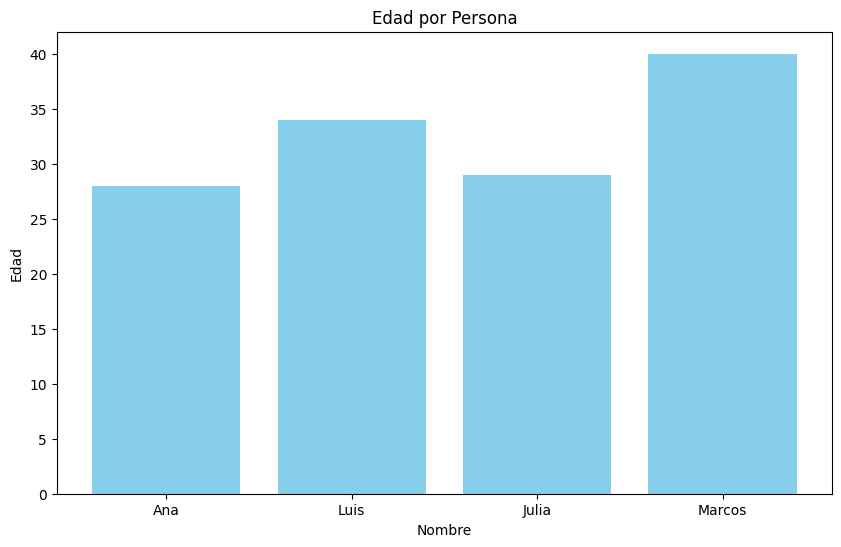

In [65]:
# Crear un gráfico con Matplotlib:

import matplotlib.pyplot as plt

# Datos para el gráfico
nombres = ['Ana', 'Luis', 'Julia', 'Marcos']
edades = [28, 34, 29, 40]

# Crear un gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(nombres, edades, color='skyblue')
plt.title('Edad por Persona')
plt.xlabel('Nombre')
plt.ylabel('Edad')

# Guardar el gráfico como una imagen PNG
plt.savefig(os.path.join(gs.the_folders.DIR_OUTPUTS_FILES, 'edad_por_persona.png'))


In [67]:
# Insertar la imagen en un archivo Excel:

# Cargar el libro de trabajo y seleccionar la hoja
wb = load_workbook(os.path.join(gs.the_folders.DIR_OUTPUTS_FILES, 'datos.xlsx'))
ws = wb['Empleados']

# Cargar e insertar la imagen
img = Image(os.path.join(gs.the_folders.DIR_OUTPUTS_FILES, 'edad_por_persona.png'))
ws.add_image(img, 'E1')  # 'E1' indica la celda en la que se posicionará la imagen

# Guardar los cambios en el archivo Excel
wb.save('datos_con_grafico.xlsx')

## Trabajo Práctico
Para consolidar lo aprendido en este capítulo, realiza las siguientes tareas:

1. Manipula datos con Pandas y exporta los resultados a un archivo Excel. Intenta realizar algunas operaciones comunes como filtrar datos, calcular promedios, o agrupar datos.

2. Crea un gráfico visualmente atractivo con Matplotlib o Seaborn basado en los datos que has trabajado. Guarda este gráfico como imagen.

3. Integra el gráfico en tu archivo Excel utilizando openpyxl, posicionándolo adecuadamente en tu hoja de trabajo.